## 20. AIM - Game:

#### As per the video:

In [10]:
import pygame 
import time
import random
import math

pygame.init()

HIG, WID = 600, 800

TARGET_EVENT = pygame.USEREVENT
TARGET_INCREMENT = 500
TARGET_PADDING = 50

BG_COLOUR = "yellow"

LIVES = 10

TOP_BAR_HIG = 50
FONT = pygame.font.SysFont('Impact',25)

WIN = pygame.display.set_mode((WID, HIG))
pygame.display.set_caption("Aim Trainer")

class Target:
    MAX_SIZE = 50
    GROWTH_RATE = 0.3
    COLOUR1 = 'red'
    COLOUR2 = 'white'

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.size = 0
        self.grow = True

    def update(self):
        if self.size + self.GROWTH_RATE >= self.MAX_SIZE:
            self.grow = False

        if self.grow:
            self.size += self.GROWTH_RATE
        else:
            self.size -= self.GROWTH_RATE

    def draw(self, win):
        pygame.draw.circle(win, self.COLOUR1, (self.x,self.y), self.size)
        pygame.draw.circle(win, self.COLOUR2, (self.x,self.y), self.size*0.8)
        pygame.draw.circle(win, self.COLOUR1, (self.x,self.y), self.size*0.6)
        pygame.draw.circle(win, self.COLOUR2, (self.x,self.y), self.size*0.4)

    def collide(self, x, y):                  # x, y is the position of the mouse.
        dis = math.sqrt((self.x - x)**2 + (self.y - y)**2)
        return dis <= self.size

def draw(win, targets):
    win.fill(BG_COLOUR)
    for target in targets:
        target.draw(win)

def format_time(secs):
    milli = math.floor(int(secs * 1000 % 1000) / 100)
    seconds = int(round(secs % 60, 1))
    minutes = int(secs // 60)

    return f"{minutes:02d}:{seconds:02d}.{milli}"

def top_bar(win, elapsed_time, target_pressed, misses):
    pygame.draw.rect(win, "black", (0,0, WID, TOP_BAR_HIG))
    
    time_label = FONT.render(f"Time: {format_time(elapsed_time)}", 1, "white")
    win.blit(time_label, (50,7))

    speed = round(target_pressed / elapsed_time, 1)
    speed_label = FONT.render(f"Speed: {speed}t/s", 1, "white")
    win.blit(speed_label, (250,7))

    hit_label = FONT.render(f"Hits: {target_pressed}", 1, 'white')
    win.blit(hit_label, (480, 7))

    lives_label = FONT.render(f"Lives: {LIVES - misses}", 1, 'white')
    win.blit(lives_label, (650, 7))

def end_screen(win, elapsed_time, target_pressed, clicks):
    win.fill(BG_COLOUR)
    time_label = FONT.render(
        f"Time: {format_time(elapsed_time)}", 1, "black")

    speed = round(target_pressed / elapsed_time, 1)
    speed_label = FONT.render(f"Speed: {speed} t/s", 1, "black")

    hits_label = FONT.render(f"Hits: {target_pressed}", 1, "black")

    try:
        accuracy = round(target_pressed / clicks * 100, 1)
        accuracy_label = FONT.render(f"Accuracy: {accuracy}%", 1, "black")
    except ZeroDivisionError:
        accuracy_label = FONT.render("Accuracy: 0%", 1, "black")

    win.blit(time_label, (get_middle(time_label), 115))
    win.blit(speed_label, (get_middle(speed_label), 215))
    win.blit(hits_label, (get_middle(hits_label), 315))
    win.blit(accuracy_label, (get_middle(accuracy_label), 415))

    pygame.display.update()

    run = True
    while run:
        for event in pygame.event.get():
            if event.type == pygame.QUIT or event.type == pygame.KEYDOWN:
                run = False
                break
                
    pygame.quit()

def get_middle(surface):
    return WID / 2 - surface.get_width()/2
    
def main():
    run = True
    targets=[]
    clock = pygame.time.Clock()
    
    target_pressed = 0
    misses = 0
    clicks = 0
    start_time = time.time()

    pygame.time.set_timer(TARGET_EVENT, TARGET_INCREMENT)
    
    while run:
        clock.tick(60)
        click = False
        mouse_pos = pygame.mouse.get_pos()

        elapsed_time = time.time() - start_time
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False
                break

            if event.type == TARGET_EVENT:
                x = random.randint(TARGET_PADDING, WID - TARGET_PADDING)
                y = random.randint(TARGET_PADDING + TOP_BAR_HIG, HIG - TARGET_PADDING)
                target = Target(x,y)
                targets.append(target)

            if event.type == pygame.MOUSEBUTTONDOWN:
                clicks += 1
                click = True

        for target in targets:
            target.update()
            
            if target.size <= 0:                           # to remove the targets after shrinking.
                targets.remove(target)
                misses+=1

            if click and target.collide(*mouse_pos):
                targets.remove(target)
                target_pressed+=1

        if misses >= LIVES:
            end_screen(WIN, elapsed_time, target_pressed, clicks)
            break

        draw(WIN, targets)
        top_bar(WIN, elapsed_time, target_pressed, misses)
        pygame.display.update()
                
    pygame.quit()

if __name__ == "__main__":
    main()


#### Output:

##### 1.
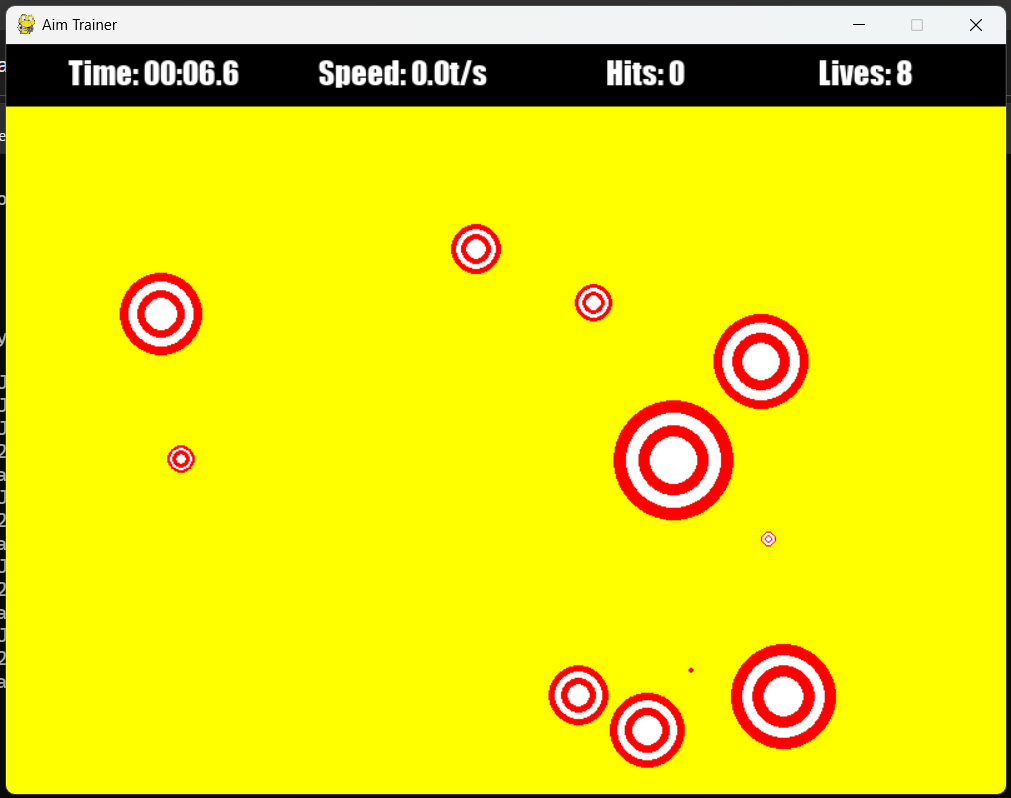
##### 2.
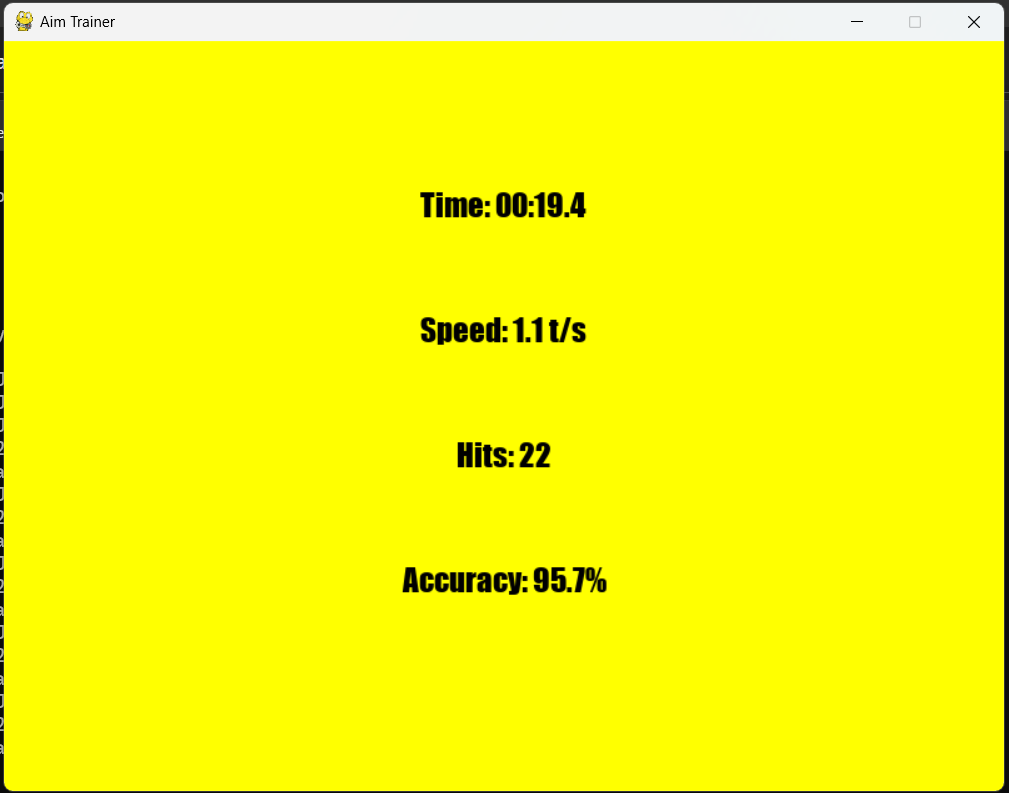

#### ----- THANK YOU -----     
DATE : 01 JAN 2025